**DSC540 - Homework 3 - Cedric Spratley - Python data exploration**\

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases #pulling in python dictionary of encoded names and associated aliases

#Ensures the matlibplots will appear directly below the cell in which the plot function was called.
%matplotlib inline

In [120]:
#Used to find encodings that work

#Below line creates a set of all available encodings

aliases_values = set(aliases.values())

for encoding in set(aliases.values()):
  try:
    df=pd.read_csv("crime.csv",nrows=10,encoding=encoding) #Reads in only 10 lines for faster processing
    print('successful', encoding)
  except:
    pass

successful cp858
successful iso8859_10
successful mac_latin2
successful iso8859_3
successful cp864
successful iso8859_8
successful iso8859_4
successful mac_iceland
successful cp1252
successful cp850
successful cp866
successful cp855
successful cp1258
successful iso8859_13
successful iso8859_15
successful iso8859_7
successful cp1253
successful cp1026
successful cp1251
successful cp932
successful cp1257
successful cp437
successful mac_turkish
successful cp273
successful mac_greek
successful cp852
successful cp865
successful cp1140
successful iso8859_2
successful cp861
successful cp857
successful cp860
successful cp037
successful utf_16_be
successful iso8859_16
successful iso8859_6
successful iso8859_14
successful gb18030
successful mac_roman
successful big5hkscs
successful hp_roman8
successful cp949
successful iso8859_5
successful cp1125
successful latin_1
successful cp863
successful cp500
successful iso8859_9
successful koi8_r
successful cp869
successful cp775
successful kz1048
successf

In [121]:
#Read in the crime.csv file and use the timestamp as a datetime index
crime = pd.read_csv("crime.csv", encoding = "ISO8859_11") # Note-Executing the code does not seem to depend on how the encoding text is formatted

In [122]:
#Quick check of what the dataset looks like
crime.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [123]:
#Checking the shape of the data. It should have 319,073 rows and 17 columns
crime.shape

(319073, 17)

In [124]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [125]:
#Question 1 - What are the most common offense descriptions?

crime.OFFENSE_DESCRIPTION.value_counts()

,count
OFFENSE_DESCRIPTION,
SICK/INJURED/MEDICAL - PERSON,18783
INVESTIGATE PERSON,18754
M/V - LEAVING SCENE - PROPERTY DAMAGE,16323
VANDALISM,15154
ASSAULT SIMPLE - BATTERY,14791
...,...
KILLING OF FELON BY POLICE,1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON,1
DRUGS - GLUE INHALATION,1


,count
OFFENSE_DESCRIPTION,
SICK/INJURED/MEDICAL - PERSON,0.058867
INVESTIGATE PERSON,0.058777
M/V - LEAVING SCENE - PROPERTY DAMAGE,0.051158
VANDALISM,0.047494
ASSAULT SIMPLE - BATTERY,0.046356
VERBAL DISPUTE,0.041053
TOWED MOTOR VEHICLE,0.035374
INVESTIGATE PROPERTY,0.034863
LARCENY THEFT FROM BUILDING,0.028423


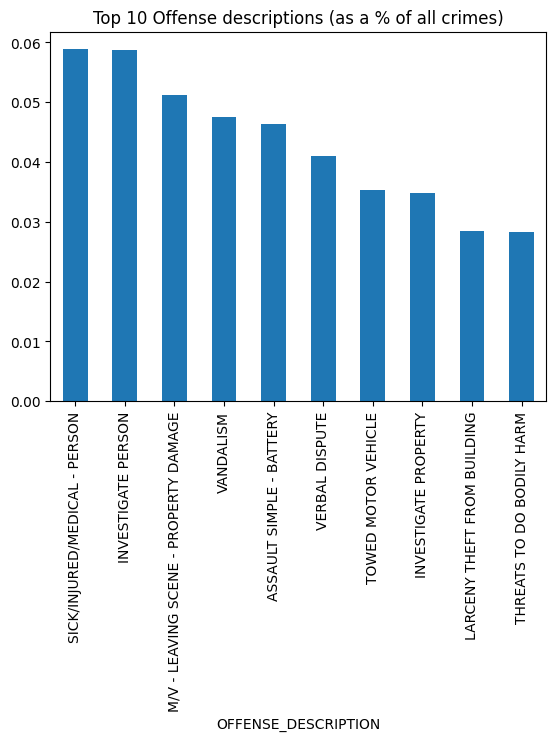

In [126]:
#Question 2 - Can you create a bar chart of the Top 10 Offense descriptions as a % of total crimes?

offense_description_topten = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_description_topten/crime.shape[0])

#Creating a bar chart of the Top 10 offense groups
(offense_description_topten/crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense descriptions (as a % of all crimes)');





,INCIDENT_NUMBER
DAY_OF_WEEK,
Friday,48495
Wednesday,46729
Thursday,46656
Tuesday,46383
Monday,45679
Saturday,44818
Sunday,40313


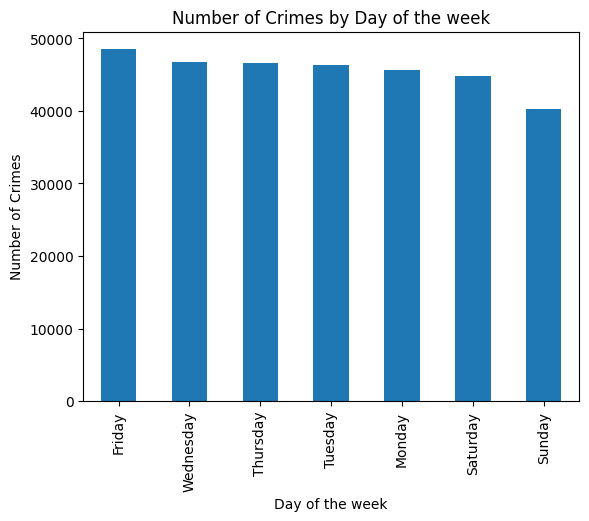

In [138]:
# Question 3 - Are there more crimes committed on specific days?


crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar');
plt.title('Number of Crimes by Day of the week');
plt.xlabel('Day of the week');
plt.ylabel('Number of Crimes');

#Display the number of crimes by day of the week
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False))

In [128]:
#On what days and during which hours are the most crimes committed?


In [129]:
#Unstacking data so that the heat map can be used

crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

DAY_OF_WEEK,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2000,1897,1997,2039,2161,2612,2400
1,1059,1018,942,1077,1275,1855,2043
2,846,641,798,774,952,1827,1855
3,583,460,412,526,532,957,1119
4,386,399,370,436,441,672,704
5,417,462,444,508,485,478,517
6,709,787,823,866,768,530,543
7,1352,1418,1441,1405,1398,1078,758
8,2046,2145,2135,2037,2041,1516,1123


In [130]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [131]:
week_and_hour.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

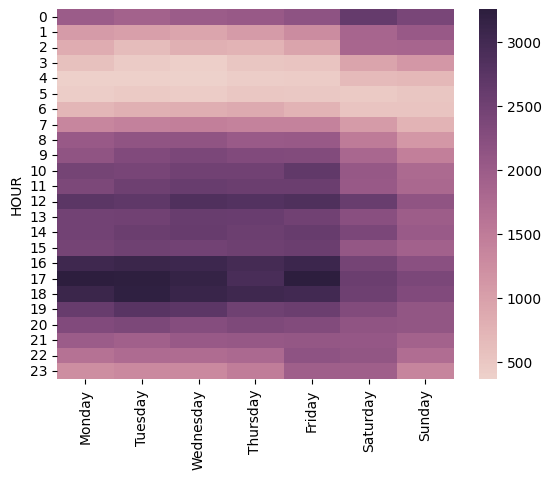

In [132]:
sns.heatmap(week_and_hour,cmap=sns.cubehelix_palette(as_cmap=True));

In [133]:
#Question 4 - In which districts were the most crimes committed on a yearly basis?

#Year and district by incident displayed unstacked

crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6015,10923,11375,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8687,15706,15680,9872
B3,5617,11145,11195,7485
C11,7364,13603,13281,8282
C6,3941,7073,7247,5199
D14,3280,6279,6509,4059
D4,7204,12953,13157,8601


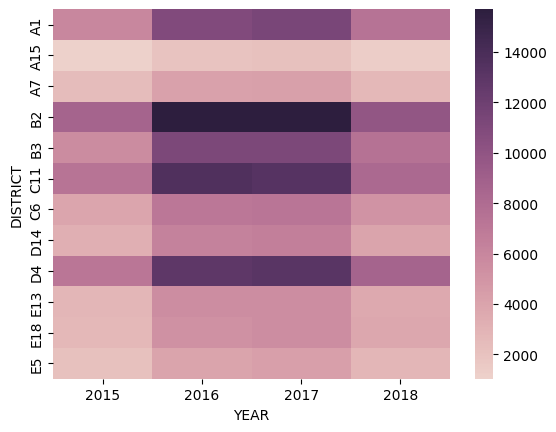

In [134]:
#Question 4 continued
year_and_district = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()
#Code to configure and  dislpay heat map
sns.heatmap(year_and_district, cmap=sns.cubehelix_palette(as_cmap=True));

In [135]:
avg_crime_district = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].mean()
#Printing average number mentioned, below
print("The average number of crimes per district, per year is: " +str (avg_crime_district))

The average number of crimes per district, per year is: 6610.583333333333


In [136]:

#Question 4 continued - Displays district crime total in blue for those that are less than the 'per year, per district' crime average calculated above
year_and_district = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime_district else None

s2 = year_and_district.style.map(style_negative, props='color:blue;')\
    .map(lambda v:'opacity: 20%;' if (v < .03) and (v > -.03) else None)

s2

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6015,10923,11375,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8687,15706,15680,9872
B3,5617,11145,11195,7485
C11,7364,13603,13281,8282
C6,3941,7073,7247,5199
D14,3280,6279,6509,4059
D4,7204,12953,13157,8601


In [137]:
#Question 4 continued - Displays the maximum crime total in a column in darkgreen text

def highlight_max(s, props=''): #declare function that higlights max value in a column
    return np.where(s == np.nanmax(s.values),props,'')

s2.apply(highlight_max, props='color:white;background-color:darkgreen',axis=0)

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6015,10923,11375,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8687,15706,15680,9872
B3,5617,11145,11195,7485
C11,7364,13603,13281,8282
C6,3941,7073,7247,5199
D14,3280,6279,6509,4059
D4,7204,12953,13157,8601
